In [1]:
#Importar las librerias
import os
import pandas as pd
import polars as pl
from core.SimularDataset import SimuladorDataset
from procesamiento.PandasPreprocessor import PandasPreprocessor
from procesamiento.PolarPreprocessor import PolarsPreprocessor
from procesamiento.BenchmarkPreprocessor import BenchmarkPreprocessor
import matplotlib.pyplot as plt

In [2]:
"""
Función que crea la carpeta data_simulada si no existe.
Por cada paciente y fase, genere el dataset. Además, guarda un CSV por paciente y fase en una subcarpeta
data_simulada/paciente_id/.
Genera un CSV combinado con todos los pacientes y fases
"""

def generar_y_guardar_datasets(pacientes, fases, duracion_por_fase=600, carpeta_base="data_simulada"):
    os.makedirs(carpeta_base, exist_ok=True)
    dfs_combinados = []

    for paciente in pacientes:
        carpeta_paciente = os.path.join(carpeta_base, paciente)
        os.makedirs(carpeta_paciente, exist_ok=True)

        for fase in fases:
            simulador = SimuladorDataset(paciente_id=paciente, fase_ela=fase, duracion=duracion_por_fase)
            df = simulador.generar()

            # Añadir columnas para identificar paciente y fase si no están explícitas
            if 'paciente_id' not in df.columns:
                df['paciente_id'] = paciente
            if 'fase_ela' not in df.columns:
                df['fase_ela'] = fase

            dfs_combinados.append(df)

            # Guardar CSV individual por paciente y fase
            nombre_archivo = f"{paciente}_fase{fase}.csv"
            ruta_archivo = os.path.join(carpeta_paciente, nombre_archivo)
            df.to_csv(ruta_archivo, index=False)
            print(f"Guardado: {ruta_archivo}")

    # Guardar un CSV combinado con todos los datos
    df_todos = pd.concat(dfs_combinados, ignore_index=True)
    ruta_combinado = os.path.join(carpeta_base, "dataset_sintetico_completo.csv")
    df_todos.to_csv(ruta_combinado, index=False)
    print(f"Guardado dataset combinado: {ruta_combinado}")

    return df_todos


In [3]:
pacientes = ["PAC_001", "PAC_002", "PAC_003", "PAC_004"]
fases = [1, 2, 3]
df_final = generar_y_guardar_datasets(pacientes, fases)

Guardado: data_simulada\PAC_001\PAC_001_fase1.csv
Guardado: data_simulada\PAC_001\PAC_001_fase2.csv
Guardado: data_simulada\PAC_001\PAC_001_fase3.csv
Guardado: data_simulada\PAC_002\PAC_002_fase1.csv
Guardado: data_simulada\PAC_002\PAC_002_fase2.csv
Guardado: data_simulada\PAC_002\PAC_002_fase3.csv
Guardado: data_simulada\PAC_003\PAC_003_fase1.csv
Guardado: data_simulada\PAC_003\PAC_003_fase2.csv
Guardado: data_simulada\PAC_003\PAC_003_fase3.csv
Guardado: data_simulada\PAC_004\PAC_004_fase1.csv
Guardado: data_simulada\PAC_004\PAC_004_fase2.csv
Guardado: data_simulada\PAC_004\PAC_004_fase3.csv
Guardado dataset combinado: data_simulada\dataset_sintetico_completo.csv


In [4]:
df = pd.read_csv("data_simulada/dataset_sintetico_completo.csv")

In [5]:
df.head()

,timestamp,paciente_id,fase_ela,aceleracion_x,aceleracion_y,aceleracion_z,magnitud_movimiento,actividad_estimada,evento_inmovilidad,estado,...,hipovent_sostenido,senal_sueno,fase_sueno,evento_fragmentacion,frag_sueno_sostenido,inmovilidad_sostenida_etiqueta,hipoxia_sostenida_etiqueta,hipovent_sostenida,frag_sueno_sostenido_etiqueta,empeoramiento
0,2025-07-17 22:25:42.117105,PAC_001,1,-0.036089,-0.016617,0.980370,0.981175,0.028753,0,reposo,...,0.0,0.034956,LIGHT,0.0,0.0,0,0,0,0,0
1,2025-07-17 22:25:42.217105,PAC_001,1,0.047091,-0.054052,1.007380,1.009928,0.033073,0,reposo,...,0.0,0.034956,LIGHT,0.0,0.0,0,0,0,0,0
2,2025-07-17 22:25:42.317105,PAC_001,1,-0.076595,-0.127015,0.902926,0.915028,0.020340,0,reposo,...,0.0,0.034956,LIGHT,0.0,0.0,0,0,0,0,0
3,2025-07-17 22:25:42.417105,PAC_001,1,-0.109611,-0.034901,1.044291,1.050607,0.053423,0,reposo,...,0.0,0.034956,LIGHT,0.0,0.0,0,0,0,0,0
4,2025-07-17 22:25:42.517105,PAC_001,1,-0.012289,-0.161155,1.009012,1.021874,0.027248,0,reposo,...,0.0,0.034956,LIGHT,0.0,0.0,0,0,0,0,0


In [6]:
df.shape

(72000, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       72000 non-null  object 
 1   paciente_id                     72000 non-null  object 
 2   fase_ela                        72000 non-null  int64  
 3   aceleracion_x                   72000 non-null  float64
 4   aceleracion_y                   72000 non-null  float64
 5   aceleracion_z                   72000 non-null  float64
 6   magnitud_movimiento             72000 non-null  float64
 7   actividad_estimada              72000 non-null  float64
 8   evento_inmovilidad              72000 non-null  int64  
 9   estado                          72000 non-null  object 
 10  inmovilidad_sostenida           72000 non-null  int64  
 11  spo2                            71940 non-null  float64
 12  frecuencia_cardiaca             

In [8]:
df.describe()

,fase_ela,aceleracion_x,aceleracion_y,aceleracion_z,magnitud_movimiento,actividad_estimada,evento_inmovilidad,inmovilidad_sostenida,spo2,frecuencia_cardiaca,...,evento_brp,hipovent_sostenido,senal_sueno,evento_fragmentacion,frag_sueno_sostenido,inmovilidad_sostenida_etiqueta,hipoxia_sostenida_etiqueta,hipovent_sostenida,frag_sueno_sostenido_etiqueta,empeoramiento
count,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,7.200000e+04,72000.000000,72000.000000,71940.000000,71940.000000,...,71943.000000,71943.000000,71952.000000,71952.000000,71952.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000
mean,2.000000,-0.000170,-0.000070,0.999950,1.016410,3.360534e-02,0.319625,0.166778,92.330565,81.113725,...,0.143183,0.303157,0.000752,0.022793,0.577051,0.166778,0.220278,0.303181,0.577333,0.786125
std,0.816502,0.062469,0.173732,0.062404,0.069210,3.329593e-02,0.466335,0.372780,3.838716,10.347234,...,0.350262,0.459626,0.300022,0.149244,0.494031,0.372780,0.414437,0.459636,0.493987,0.410042
min,1.000000,-0.405301,-0.767661,0.652999,0.667401,4.004280e-08,0.000000,0.000000,82.761607,58.995299,...,0.000000,0.000000,-1.005677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-0.029398,-0.052306,0.970529,0.983801,7.055341e-03,0.000000,0.000000,90.052852,72.676098,...,0.000000,0.000000,-0.205059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000016,0.000137,0.999964,1.006104,2.325944e-02,0.000000,0.000000,92.962131,80.785424,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,3.000000,0.029474,0.052243,1.029646,1.052714,5.074017e-02,1.000000,0.000000,95.421369,89.690929,...,0.000000,1.000000,0.200941,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,0.445493,0.741235,1.395645,1.448572,2.806036e-01,1.000000,1.000000,99.325245,103.971119,...,1.000000,1.000000,0.987190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print("Eventos de hipoxia:", df['hipoxia_sostenida'].sum())
print("Eventos de hipoventilación:", df['hipovent_sostenido'].sum())
print("Eventos de inmovilidad:", df['inmovilidad_sostenida'].sum())
print("Eventos de fragmentación de sueño:", df['frag_sueno_sostenido'].sum())
print("Eventos de empeoramiento global:", df['empeoramiento'].sum())


Eventos de hipoxia: 15840.0
Eventos de hipoventilación: 21810.0
Eventos de inmovilidad: 12008
Eventos de fragmentación de sueño: 41520.0
Eventos de empeoramiento global: 56601


In [10]:
# Se carga el dataset con la libreria de polars
df_polars = pl.read_csv("data_simulada/dataset_sintetico_completo.csv")

Ejecutando PandasPreprocessor...
Ejecutando PolarsPreprocessor...

Benchmarking completado:
➡ Pandas: 139.2317s, 1906.2695MB
➡ Polars: 1.8774s, 1022.7266MB


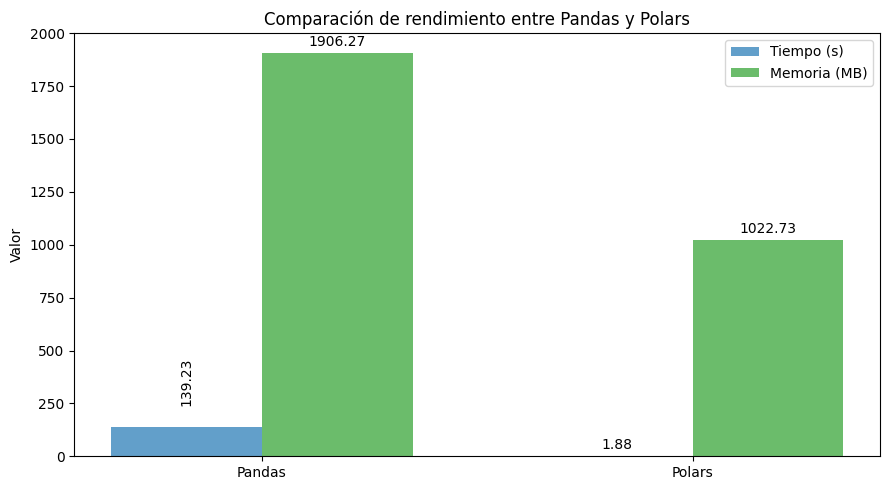

In [11]:
# Inicializar y ejecutar el benchmarking
benchmark = BenchmarkPreprocessor(
    pandas_class=PandasPreprocessor,
    polars_class=PolarsPreprocessor,
    df_pandas=df,
    df_polars=df_polars,
    generar_secuencias=True  # False si solo es para comparar el procesamiento
)

benchmark.run_benchmark()
benchmark.plot_results()


In [15]:
# Realizar el preprocesamiento con pandas por compatibilidad con las librerias de scikit-learn, tensorflow y pytorch
pre = PandasPreprocessor(df)
X, y = pre.run_all(export_path="data_simulada/preprocesado.csv", generar_secuencias=True)